# Stroop effect

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

### 1. What is our independent variable? What is our dependent variable?

- Independent variable: congruent/incongruent words condition
- Dependent variable: time to read words list

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Incongruent words seem to be harder to read than congruent words: we want to test if congruent words lists are read faster than incongruent words lists.

##### Set of hypotheses:
   - $H_{0}: \mu_{c} = \mu_{i}$   Null hypothesis: time to read congruent words is the same as time to read incongruent words.
   - $H_{a}: \mu_{c} < \mu_{i}$   Alternative hypothesis: time to read congruent words is lower than time to read incongruent words.

##### Statistical test:
We don't have any statistics about a "words list reading performance" population, so we cannot use z-tests. We will use a t-test. Since we are expecting an improvement of reading speed (lower reading time) with congruent words, we will use a one-tail test, instead of a basic two-tail test. We will use the common recommended alpha criterion for decision.
- One-tail t-test
- $\alpha = 0.05$

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import t

import seaborn as sns
df = pd.read_csv('stroopdata.csv')

dfstat = pd.concat([
    (df.describe()
     .rename({'50%': 'median'})
     .loc[['count', 'mean', 'median', 'std'], :]
     ),
    (df.sem()
     .to_frame()
     .rename(columns={0: 'sem'})
     .T
     )
])

dfstat

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
median,14.356500,21.017500
std,3.559358,4.797057
sem,0.726551,0.979195


Both datasets contain 24 samples.

#### For congruent words list:
Central tendency:
- the mean is 14.05 
- the median is 14.36
- median and mean are close: the dataset seems to have no skew

Variability:
- the standard deviation is 3.56
- the standard error of the mean is 0.73

#### For incongruent words list:
Central tendency:
- the mean is 22.02 
- the median is 21.02
- median and mean are close: the dataset seems to have no skew

Variability:
- the standard deviation is 4.80
- the standard error of the mean is 0.98


### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

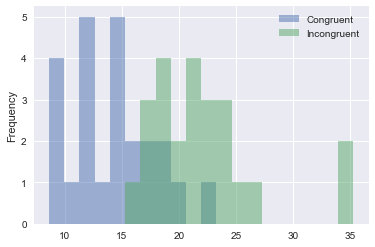

In [3]:
%matplotlib inline
df.plot(kind='hist', bins = 20, alpha=0.5)

Both datasets (*Congruent/Incongruent*) seem to have a normal distribution
To be noted: *Incongruent* data seem to have some extreme data points (around 35)

We can see that *Incongruent* data are centered on a much higher mean value than *Congruent* data. So we expect to reject the null hypothesis.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [3]:
diff = df.Congruent - df.Incongruent
diff_mean = diff.mean()

################### CORRECTED PART HERE
# computed using a 'manual' formula for debugging
n = len(diff)
diff_sem = np.sqrt(((diff - diff_mean)**2).sum() / (n - 1)) / np.sqrt(n)
# computed using a function from a library
diff_sem = diff.sem()
################### END OF CORRECTED PART

t_statistic = diff_mean / diff_sem

# 1-tail t-test
ddof = n - 1
alpha = 0.05

# t critical value read 'manually' from a table for debugging
t_critical = -1.714
# t critical value computed using a function from a library
t_critical = t.ppf(alpha, ddof)

print('t critical value: {:.3f} (for alpha={})'.format(t_critical, alpha))
print('t statistic: {:.3f}'.format(t_statistic))
print('null hypothesis {}\n'.format('rejected' if t_statistic < t_critical else 'accepted'))

# 95% confidence interval
t_95 = t.ppf(1 - 0.025, ddof)
confidence95 = (diff_mean - t_95 * diff_sem, diff_mean + t_95 * diff_sem)
print('''95% confidence interval: difference between congruent and incongruent reading time is
between {:.2f}s and {:.2f}s with 95% confidence.
'''.format(*confidence95))

p_value = t.cdf(t_statistic, ddof)
print('p value: {:.3e}'.format(p_value))
r2 = t_statistic**2 / (t_statistic**2 + ddof)
print('R2: {:.3f}'.format(r2))

t critical value: -1.714 (for alpha=0.05)
t statistic: -8.021
null hypothesis rejected

95% confidence interval: difference between congruent and incongruent reading time is
between -10.02s and -5.91s with 95% confidence.

p value: 2.052e-08
R2: 0.737


The null hypothesis is __rejected__, since the *t statistic* is much lower than the *t critical value*. The *p value* is much lower than the recommended $\alpha$ criterion, so we have a high confidence in this result.

This result matches our expectations, as we have seen the data distributions were clearly not centered around the same mean value.

### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!